**Group 13**

Arnav Chauhan- 22020845009

Hrithik Prakash Bokade - 22020845015

Pranav Mehta - 22020845024

Edges are significant local changes of intensity in a digital image. An edge can be defined as a set of connected pixels that forms a boundary between two disjoint regions. There are three types of edges:

- Horizontal edges
- Vertical edges
- Diagonal edges

Edge Detection is a method of segmenting an image into regions of discontinuity. It is a widely used technique in digital image processing like
- pattern recognition
- image morphology
- feature extraction

Edge detection allows users to observe the features of an image for a significant change in the gray level. This texture indicating the end of one region in the image and the beginning of another. It reduces the amount of data in an image and preserves the structural properties of an image.

Edge Detection Operators are of two types:

1. Gradient – based operator which computes first-order derivations in a digital image like, Sobel operator, Prewitt operator, Robert operator
2. Gaussian – based operator which computes second-order derivations in a digital image like, Canny edge detector, Laplacian of Gaussian

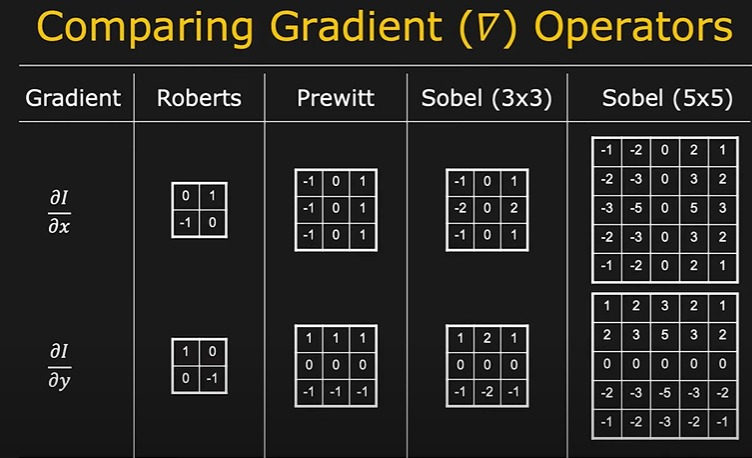

In [40]:
!pip install opencv-python

In [41]:
import matplotlib.pyplot as plt
import cv2

In [42]:
# Converting Color Space
# The cvtColor function is used to convert the color space of the image from the default BGR (Blue, Green, Red) to RGB (Red, Green, Blue)
# This is done because Matplotlib expects RGB format when displaying images
image = cv2.imread('Optimus.png')

In [43]:
# Check if the image is loaded successfully
if image is not None:
    print(image.shape)
else:
    print('Image not loaded!')

(2160, 4096, 3)


The code cv2.cvtColor(image, cv2.COLOR_BGR2RGB) is converting the color space of the image from BGR (Blue, Green, Red) to RGB (Red, Green, Blue).

1. BGR Color Space: In OpenCV, the default color space for image representation is BGR. This means that, for each pixel, the channels are arranged in the order of Blue, Green, and Red.

2. RGB Color Space: The RGB color space is another common representation, where the channels are arranged in the order of Red, Green, and Blue.

- The cv2.cvtColor() function is used to convert an image from one color space to another. In this case, it's converting the image from BGR to RGB. 

In [44]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [45]:
# Getting Image Dimensions

# Getting the height, width, and number of channels of the image
# The shape attribute of the image provides a tuple representing its dimensions: height, width, and the number of channels
# Here, hgt, wdt, and _ (underscore) are used to unpack these values. The number of channels is not explicitly used in this code
hgt, wdt,_ = image.shape

In [46]:
# Apply Sobel operator for edge detection in both X and Y directions

# These lines apply the Sobel operator in both the X and Y directions to compute the gradients of the image
# The CV_64F indicates that the output should be in 64-bit floating-point format
# The ksize parameter specifies the size of the Sobel kernel

# Sobel Edges
x_sobel = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
y_sobel = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)

The Sobel operator is a convolution-based filter that calculates the gradient of the image intensity. It works by convolving the image with a small, separable filter in both the horizontal (X) and vertical (Y) directions. The filter emphasizes changes in intensity that occur along these directions.

The Sobel operator kernels for X and Y directions look like the following:

- Sobel X: [ -1 0 1 ] [ -2 0 2 ] [ -1 0 1 ]
- Sobel Y: [ -1 -2 -1 ] [ 0 0 0 ] [ 1 2 1 ]

The convolution operation is applied to the image, resulting in two new images: one representing the gradient in the X direction (horizontal changes in intensity) and another representing the gradient in the Y direction (vertical changes in intensity).

- cv2.Sobel: This is the function in OpenCV used to apply the Sobel operator.
- cv2.CV_64F: Specifies that the output should be in 64-bit floating-point format.
- 0 and 1: Indicates the direction of the Sobel operator. In the first line, 0 means the Sobel operator is applied in the X direction (horizontal), and in the second line, 1 means the Sobel operator is applied in the Y direction (vertical).
- ksize=5: Specifies the size of the Sobel kernel. Larger kernel sizes result in smoother gradients but may lose finer details.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


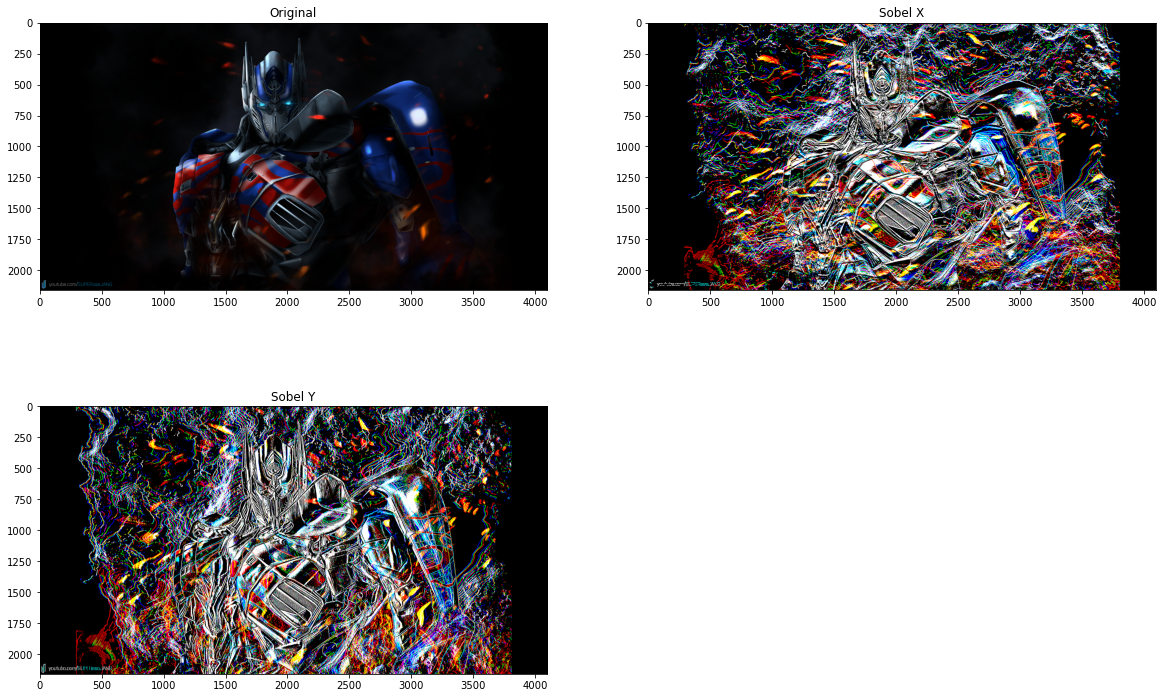

In [47]:
# Create a subplot with 3 rows, 2 columns, and set the size of the entire figure

plt.figure(figsize=(20, 20))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)
plt.subplot(3, 2, 2)
plt.title("Sobel X")
plt.imshow(x_sobel)
plt.subplot(3, 2, 3)
plt.title("Sobel Y")
plt.imshow(y_sobel)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


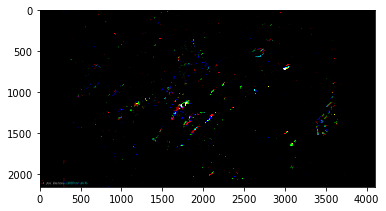

In [48]:
# Combine the results of Sobel X and Sobel Y using bitwise OR

sobel_or = cv2.bitwise_or(x_sobel, y_sobel)
plt.imshow(sobel_or)

The code you provided is combining the results of two Sobel operators (applied in the x and y directions) using the bitwise OR operation and then visualizing the result using Matplotlib.

1. *Sobel Operators* - Here, x_sobel is the result of applying the Sobel operator in the x-direction (horizontal), and y_sobel is the result of applying the Sobel operator in the y-direction (vertical).

2. *Bitwise OR Operation* - The cv2.bitwise_or() function performs a bitwise OR operation between the two Sobel results (x_sobel and y_sobel). This operation combines the edges detected in both the x and y directions, resulting in an image where edges from both directions are considered.

3. *Visualization using Matplotlib* - Matplotlib to display the result of the combined edges (sobel_or). plt.imshow() is a function from Matplotlib's pyplot module that displays an image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


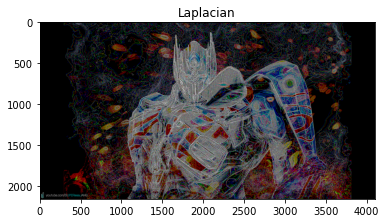

In [49]:
# Apply Laplacian operator for edge detection

laplacian = cv2.Laplacian(image, cv2.CV_64F)
plt.title("Laplacian")
plt.imshow(laplacian)

The Laplacian operator is a second-order derivative operator used in image processing for edge detection. It is particularly effective in highlighting regions of rapid intensity change, which typically correspond to edges in an image. The Laplacian is computed by taking the sum of the second derivatives in both the X and Y directions.

The Laplacian operator is often represented by the following 3x3 kernel:

- [ 0 1 0 ] 
- [ 1 -4 1 ] 
- [ 0 1 0 ]
Marr-Hildreth Operator or Laplacian of Gaussian (LoG): It is a gaussian-based operator which uses the Laplacian to take the second derivative of an image. This really works well when the transition of the grey level seems to be abrupt. It works on the zero-crossing method i.e when the second-order derivative crosses zero, then that particular location corresponds to a maximum level. It is called an edge location. Here the Gaussian operator reduces the noise and the Laplacian operator detects the sharp edges. The Gaussian function is defined by the formula:

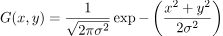

Where

is the standard deviation. And the LoG operator is computed from
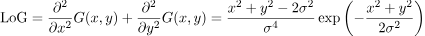

*Advantages:*

-Easy to detect edges and their various orientations

-There is fixed characteristics in all directions

*Limitations:*

-Very sensitive to noise

-The localization error may be severe at curved edges

-It generates noisy responses that do not correspond to edges, so-called “false edges”

*The Canny edge detection algorithm is a multi-stage process that involves smoothing the image with a Gaussian filter, finding the intensity gradients, applying non-maximum suppression, and finally, performing edge tracking by hysteresis. The two thresholds mentioned (50 and 120) are critical parameters in the Canny edge detection process.*

Here's why these specific thresholds are used:

1. *Gradient Magnitude*: In the Canny edge detection algorithm, the image is first convolved with a Gaussian filter to smooth it and reduce noise. Then, the gradient magnitude and direction are calculated using derivatives in the X and Y directions (Sobel operators).

2. *Non-Maximum Suppression*: After computing the gradient magnitude, the algorithm performs non-maximum suppression. This involves identifying the local maxima in the gradient magnitude. Pixels that do not represent local maxima are set to zero.

3. *Double Thresholding*: The double thresholding step involves categorizing the remaining edge pixels into strong, weak, or non-edge pixels based on two threshold values:

4. *Low Threshold (50)*: Pixels with gradient magnitudes below this value are marked as non-edge pixels.

5. *High Threshold (120)*: Pixels with gradient magnitudes above this value are marked as strong edge pixels.

Pixels with gradient magnitudes between the low and high thresholds are marked as weak edge pixels.

- *Edge Tracking by Hysteresis:* The weak edge pixels are considered as potential edges. The algorithm now performs edge tracking by hysteresis. Weak pixels are included in the final edge map only if they are connected to strong edge pixels.

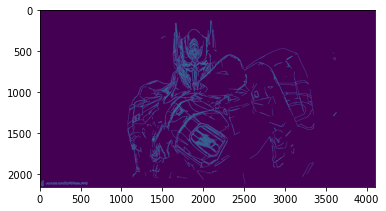

In [50]:
## There are two values: threshold1 and threshold2.
## Those gradients that are greater than threshold2 => considered as an edge
## Those gradients that are below threshold1 => considered not to be an edge.
## Those gradients Values that are in between threshold1 and threshold2 => either classiﬁed as edges or non-edges
# The first threshold gradient
# Apply Canny edge detection with thresholds 50 and 120

canny = cv2.Canny(image, 50, 120)
plt.imshow(canny)


**The Canny edge detection algorithm** is a multi-stage process that involves smoothing the image with a Gaussian filter, finding the intensity gradients, applying non-maximum suppression, and finally, performing edge tracking by hysteresis. The two thresholds mentioned (50 and 120) are critical parameters in the Canny edge detection process.

Here's why these specific thresholds are used:


1.   **Gradient Magnitude:**
In the Canny edge detection algorithm, the image is first convolved with a Gaussian filter to smooth it and reduce noise. Then, the gradient magnitude and direction are calculated using derivatives in the X and Y directions (Sobel operators).

2.   **Non-Maximum Suppression:**
After computing the gradient magnitude, the algorithm performs non-maximum suppression. This involves identifying the local maxima in the gradient magnitude. Pixels that do not represent local maxima are set to zero.

3.   **Double Thresholding:**
The double thresholding step involves categorizing the remaining edge pixels into strong, weak, or non-edge pixels based on two threshold values:

*   Low Threshold (50): Pixels with gradient magnitudes below this value are marked as non-edge pixels.

*   High Threshold (120): Pixels with gradient magnitudes above this value are marked as strong edge pixels.

Pixels with gradient magnitudes between the low and high thresholds are marked as weak edge pixels.

4.   **Edge Tracking by Hysteresis:**
The weak edge pixels are considered as potential edges. The algorithm now performs edge tracking by hysteresis. Weak pixels are included in the final edge map only if they are connected to strong edge pixels.


## **Some Real-world Applications of Image Edge Detection:**

*   medical imaging, study of anatomical structure
*   locate an object in satellite images
*   automatic traffic controlling systems
*   face recognition, and fingerprint recognition

Research Paper Links- 

1. https://www.researchgate.net/profile/Mahgoub-Hammad/publication/276576665_Gradient_Based_Image_Edge_Detection/links/55efdfca08ae199d47c03137/Gradient-Based-Image-Edge-Detection.pdf
    
    
    
2. https://d1wqtxts1xzle7.cloudfront.net/31159717/Maini-libre.pdf?1392250617=&response-content-disposition=inline%3B+filename%3DStudy_and_comparison_of_various_image_ed.pdf&Expires=1705147937&Signature=UY2GcWncm41My22~T6PGltyNsftJIlA506K9ErsA1VPWsl~l5uRVuFX8YkpWhDk-z3cxf-9cTi0W73eQGt2svpoqhvSjf1CDoNZ23KJrU1IhbU7-XtasVBEUI5Vhd7oKz~eJpYfsnKS1hZ66Djesf8RGl~oYAheWOwQZ8Si9g4xD72vhHWZW9GrBRUUazPrZ6xoMXG1-vtiYI1pGK1j1b6p8-ySU~2gPFVRnhSfg6E6aI3PB3uJdL63iLQAQnRiJJPZAsobFh~7Pk4GOPBd3982029O61qRDVfRy-AwvhG1TKA3CkX1i4N-J-yEbTdWFyD71bUE0-EDhs5ZGHwBxVA__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA
